In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout, LSTM

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv("./PETR4-SA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-26,27.120001,27.219999,26.750000,26.750000,20.130795,40249400
1,2023-04-27,26.850000,27.180000,25.910000,26.100000,19.641634,115632700
2,2023-04-28,23.600000,24.049999,23.150000,23.700001,20.091066,81138500
3,2023-05-02,23.700001,23.740000,22.639999,22.740000,19.277252,67911100
4,2023-05-03,22.600000,22.990000,22.420000,22.660000,19.209431,51133700
...,...,...,...,...,...,...,...
246,2024-04-22,40.759998,41.590000,40.520000,41.500000,40.419792,51775500
247,2024-04-23,41.400002,41.630001,40.959999,41.419998,40.341873,35456900
248,2024-04-24,41.549999,41.990002,41.209999,41.230000,40.156818,45388300
249,2024-04-25,41.400002,42.480000,41.080002,42.220001,41.121052,66372400


In [9]:
df["Open"]

0      27.120001
1      26.850000
2      23.600000
3      23.700001
4      22.600000
         ...    
246    40.759998
247    41.400002
248    41.549999
249    41.400002
250    41.290001
Name: Open, Length: 251, dtype: float64

In [10]:
escalador = MinMaxScaler()
df["Open"] = escalador.fit_transform(df["Open"].values.reshape(-1, 1))

In [11]:
df["Open"]

0      0.224095
1      0.210709
2      0.049579
3      0.054536
4      0.000000
         ...   
246    0.900347
247    0.932077
248    0.939514
249    0.932077
250    0.926624
Name: Open, Length: 251, dtype: float64

In [12]:
tamanho_dados = len(df["Open"])
tamanho_sequencia = 50
termino_previsao = tamanho_dados - tamanho_sequencia
matriz = []
Y = []
for i in range(termino_previsao):
  lista_temp = []
  for coluna in range(tamanho_sequencia):
    lista_temp.append(df["Open"][i + coluna])
  print(lista_temp)
  Y.append(df["Open"][i + tamanho_sequencia])
  matriz.append(lista_temp)
  print("*"*30)

[0.22409524045612272, 0.2107089737233514, 0.049578582052553166, 0.05453648983639048, 0.0, 0.014377739216658192, 0.03470495785820504, 0.09172042637580557, 0.08973723351512142, 0.09866137828458088, 0.07585518096182442, 0.1477441745166086, 0.17154184432325215, 0.17402087258304388, 0.1983143282102131, 0.14823996033713427, 0.17253346554288518, 0.16261769955379268, 0.15121467526028742, 0.1809618244918194, 0.20822999504214157, 0.20872578086266724, 0.205751115518096, 0.2042637084779375, 0.18195339613287032, 0.18344070401586499, 0.23946455131383226, 0.24491824491819525, 0.2404561725334653, 0.29995042141794714, 0.32226078334159625, 0.37778874566187404, 0.3292017848289537, 0.3143282597917696, 0.37679727317798695, 0.32870599900842823, 0.3485373822508675, 0.3817550322260781, 0.4129895884977688, 0.43926618740704004, 0.4263758552305401, 0.37283098661378267, 0.4129895884977688, 0.3956370847793751, 0.4164600892414474, 0.4164600892414474, 0.35299945463559723, 0.36489831432821007, 0.3748140803173028, 0.3

In [13]:
Y

[0.3549826474962814,
 0.3227566187407038,
 0.34357962320277613,
 0.32721869112543356,
 0.32077342588001967,
 0.34209221616261765,
 0.2880515617253345,
 0.31730292513634084,
 0.3078829449677738,
 0.32077342588001967,
 0.3247397124442237,
 0.3569657411998015,
 0.3916707982151708,
 0.4139812097174018,
 0.4090233019335645,
 0.3386217154189388,
 0.3817550322260781,
 0.42092216162617735,
 0.3921665840356965,
 0.4129895884977688,
 0.40158656420426353,
 0.3599405552801189,
 0.3624194348041645,
 0.37729295984134836,
 0.3817550322260781,
 0.3971244918195338,
 0.3906792265741199,
 0.46851755081804636,
 0.4164600892414474,
 0.4536440257808625,
 0.43678730788299425,
 0.4511651462568169,
 0.3916707982151708,
 0.4263758552305401,
 0.4794248884481904,
 0.4848785820525532,
 0.47099643034209193,
 0.4858702032721862,
 0.4863658899355474,
 0.5012394149727317,
 0.47645012394645514,
 0.49975210708973705,
 0.4794248884481904,
 0.5329696579077836,
 0.5394149727317794,
 0.5389192364898363,
 0.5428854238968763,

In [14]:
print("Tamanho Y: ", len(Y))
print("Tamanho matriz: ", len(matriz))

Tamanho Y:  201
Tamanho matriz:  201


In [15]:
modelo = Sequential()
modelo.add( LSTM( 64, input_shape=(tamanho_sequencia, 1), activation="tanh", return_sequences=True ) )
modelo.add( Dropout(0.2) )
modelo.add( LSTM( 64, activation="tanh", return_sequences=True ) )
modelo.add( Dropout(0.2) )
modelo.add( LSTM( 64 ) )
modelo.add( Dropout(0.2) )
modelo.add( Dense( 1 ) )
modelo.summary()

D:\usr\anaconda312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
modelo.compile( optimizer="adam", loss="mean_squared_error", metrics=["Accuracy"])

In [17]:
modelo.fit( np.array(matriz), np.array(Y), epochs=200, batch_size=32 )

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - Accuracy: 0.0000e+00 - loss: 0.2956
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - Accuracy: 0.0027 - loss: 0.0379
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - Accuracy: 0.0069 - loss: 0.0295
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - Accuracy: 0.0069 - loss: 0.0237
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - Accuracy: 0.0027 - loss: 0.0155
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - Accuracy: 0.0108 - loss: 0.0136
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - Accuracy: 0.0037 - loss: 0.0120
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - Accuracy: 0.0037 - loss: 0.0116
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - Accuracy: 0.0019 - loss: 0.0135  
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - Accuracy: 0.0019 - loss: 0.0114  
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - Accuracy: 0.0050 - loss: 0.0109
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - 

In [18]:
Y_hat = modelo.predict(np.array(matriz))

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 351ms/step


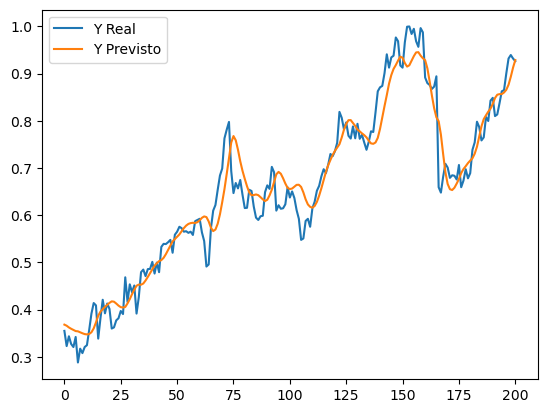

In [19]:
plt.plot(Y, label="Y Real")
plt.plot(Y_hat, label="Y Previsto")
plt.legend()
plt.show()